In [1]:
import pnad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pnad import Gender, Race

# Accessing data

First, select the year we will use to make the rest of the analysis.

Our main entry point is the ~~`pnad.load_person`~~ `pnad.load` function, that load specific columns from a PNAD survey of an specific year. We will select some basic variables.

In [20]:
YEAR = 2012
a = ['~income~', 'age', 'education_years', 'race', 'gender', 'weight']
fields = ['V8005', 'V6007', 'V0404', 'V0302', 'V4729']
data = pnad.load(YEAR, fields)

TypeError: 'DataFrameProxy' object does not support item assignment

Pandas makes it very easy to filter and transform the dataframe. We will select only the adult entries (people with age >= 18) and make some further analysis.

We use the `groupby` function of data frames to collect basic statistics about our sample. We can, for instance, check how income and education differs in different categories.

In [25]:
adults = data[data.age >= 18]
adults.groupby('race').mean()

,income,age,education_years,weight
race,,,,
ASIAN,2667.978701,45.28125,10.134413,685.205335
BLACK,1084.796778,41.87500,7.240347,527.641655
BROWN,1110.029069,40.78125,7.257243,518.042794
INDIGENOUS,1117.213092,40.75000,6.619151,425.052017
UNKNOWN,622.000000,38.84375,0.000000,376.250000
WHITE,1883.334128,43.50000,8.824132,598.413278


In [26]:
adults.groupby('gender').mean()

,income,age,education_years,weight
gender,,,,
FEMALE,1170.816294,42.75000,8.149833,554.086729
MALE,1731.052435,41.40625,7.751917,555.829333


Those results cannot be taken as the real sample mean since we do not consider the statistical weight of each entry. The "weight" column indicates the number of people each entry represents in the survey. Summing over it gives an estimate of the total population.

In [27]:
population_mi = data.weight.sum() / 1e6
population_mi

199.688907

## Basic statistics

The values shown on the tables above are similar to the correct ones, but now we will account for the weights.


In [28]:
col = 'income'
by = ['gender'] # ['race', 'gender']

a, b = 70, 75
df = data[(data.age > a) | (data.age < b)]
df.income.fillna(0, inplace=True)
df = data

df['weighted'] = df[col] * df.weight
groups = df[[*by, 'weight', 'weighted']].groupby(by).sum()
income = groups.weighted / groups.weight
income / income.max()

gender
FEMALE    0.597079
MALE      1.000000
dtype: float64

# Age distribution

In [29]:
df = data[data.race != 'UNKNOWN']
df = df[['gender', 'age', 'weight']]

In [30]:
MAX_AGE = 120

females = df[['age', 'weight']][df.gender == 'FEMALE']
males = df[['age', 'weight']][df.gender == 'MALE']

In [31]:
female_data = females.groupby('age').sum().weight.values.copy()
male_data = males.groupby('age').sum().weight.values.copy()

In [32]:
def smooth(arr, by=5):
    arr.resize(MAX_AGE, refcheck=False)
    arr = arr.reshape((MAX_AGE // by, by))
    return arr.sum(1)

female_data = smooth(female_data)
male_data = smooth(male_data)

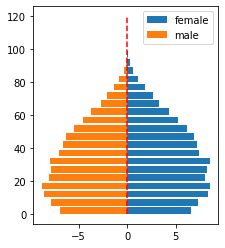

In [33]:
plt.barh(np.arange(2, MAX_AGE, 5), female_data / 1e6, height=4.0, label='female')
plt.barh(np.arange(2, MAX_AGE, 5), -male_data / 1e6, height=4.0, label='male')
plt.plot([0, 0], [0, MAX_AGE], 'r--')
plt.legend()
ax = plt.gca()
ax.set_aspect(1.5e6 / max(female_data.max(), male_data.max()))
plt.show()

1982
1987
1989
1990
1992
1993
1995
1996
1997
1998
1999
2001
2002
2003
2004
2005
2006
2007
2008
2009
2011
2012


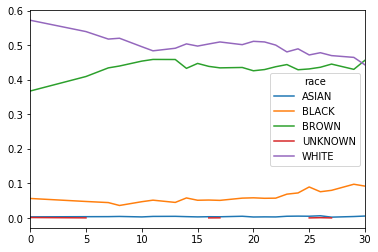

In [36]:
import pnad
import pandas as pd
import matplotlib.pyplot as plt

year_born = 1982
df = pd.DataFrame()
for year in pnad.years():
    if year in (1976, 1977, 1978, 1979, 1981, 1983, 1984, 1985, 1986, 1988, 2015):
        continue
    print(year)
    data = pnad.load_person(year, ['race', 'weight', 'age'])
    data = data[data.age == year - year_born]
    df[year - year_born] = (data[['race', 'weight']].groupby('race').sum() / data.weight.sum()).weight
    #df[year - year_born] = data.groupby('race').count().weight
    
df.T.plot()
plt.show()

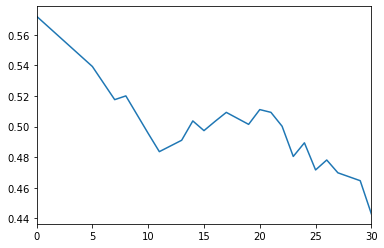

In [37]:
df.T.WHITE.plot()

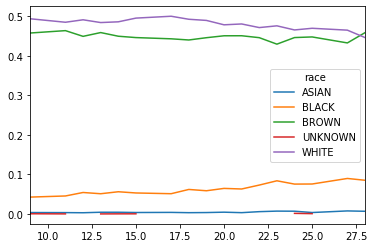

In [14]:
df.T.iloc[5:].plot()
plt.show()

In [15]:
df.T

race,ASIAN,BLACK,BROWN,UNKNOWN,WHITE
-2,NaN,NaN,NaN,NaN,NaN
3,0.004888,0.041748,0.413810,0.000379,0.539175
5,0.005333,0.046365,0.424592,NaN,0.523710
6,0.003068,0.045496,0.431418,NaN,0.520018
8,0.002621,0.045504,0.463525,NaN,0.487571
9,0.003552,0.042648,0.457991,0.000449,0.494051
11,0.003362,0.045484,0.464015,0.000173,0.485234
12,0.003036,0.054298,0.449550,NaN,0.491470
13,0.004277,0.051147,0.459123,0.000062,0.484456
14,0.004279,0.056175,0.449863,0.000247,0.486332


/usr/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 28.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


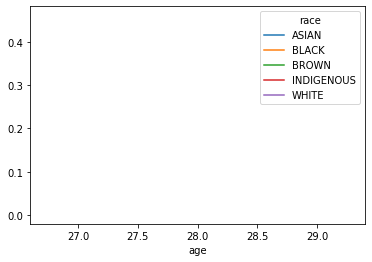

In [21]:
df = pnad.load_person(1982, ['age', 'race', 'gender', 'income', 'weight'])
df = df[df.income >= 2 * df.income.mean()]
df = data[data.race != 'UNKNOWN'].groupby(['age', 'race']).sum()
df[df.index.names] = df.index.to_frame()

x = df.pivot('age', 'race', 'weight').fillna(0).iloc[:90]
x = x / x.sum(1).values[:, None]
x.plot()

In [20]:
x.plot.scatter('BROWN', 'WHITE')

NameError: name 'x' is not defined

In [ ]:
x

In [ ]:
np.corrcoef(x.BLACK, x.WHITE + x.BROWN)

In [ ]:
x.corr()

In [ ]:
data

In [ ]:
from pnad import Race

In [ ]:
s = Race.categorical([1, 2, 4, 8, 16, 16, 16, 2, 2, 2, 2])

In [ ]:
s == 'ASIAN'

In [ ]:
s.cat.

In [ ]:
import sklearn.encode

In [ ]:
df = data[['income', 'education_years', 'gender']].copy()
df['gender'] = (df.pop('gender') == 'MALE') + 0.0

In [ ]:
from sklearn.decomposition import PCA

plt.scatter(*PCA(2).fit_transform(df.fillna(0).values).T)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
X = df.fillna(0).values
y = (data.race == 'WHITE') | (data.race == 'ASIAN')
nb.fit(X, y)

In [ ]:
nb.score(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = ExtraTreesClassifier()
rf.fit(X, y)

In [ ]:
rf.score(X, y)

In [ ]:
rf.feature_importances_

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

In [ ]:
dt.score(X, y)

In [ ]:
dt.decision_path(X)


In [ ]:
tree.plot_tree(dt)

In [ ]:
path = '/home/chips/usa_00001.csv.gz'

In [ ]:
pd.read_csv(path)

In [ ]:
d = _

In [ ]:
d.describe()

In [ ]:
df = d[['YEAR', 'RACE', 'AGE', 'HHWT']]

In [ ]:
df = df[df.YEAR == 2002]

In [ ]:
df.HHWT.sum()

In [ ]:
dd = df[['HHWT', 'RACE', 'AGE']].groupby(['AGE', 'RACE']).sum()
dd[['AGE', 'RACE']] = dd.index.to_frame()

In [ ]:
d1 = dd.pivot('AGE', 'RACE', 'HHWT')
d1 /= d1.sum(1).values[:, None]

In [ ]:
d1.plot()